In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
citydf = pd.read_csv(city_data_to_load)
ridedf = pd.read_csv(ride_data_to_load)
citydf.head()
ridedf.head()
# Combine the data into a single dataset

ridecitydf = pd.merge(citydf, ridedf, on='city', how='outer')

# Display the data table for preview
ridecitydf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
citydf.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ridecitydf['type'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

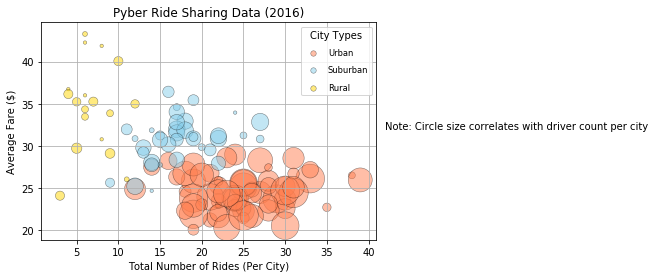

In [4]:
# Obtain the x and y coordinates for each of the three city types
ridecitydf['type'].unique()

urbandata = ridecitydf[ridecitydf['type'] == 'Urban']
suburbandata = ridecitydf[ridecitydf['type'] == 'Suburban']
ruraldata = ridecitydf[ridecitydf['type'] == 'Rural']

urbanridecount = urbandata.groupby(['city']).count()['ride_id']
suburbanridecount = suburbandata.groupby(['city']).count()['ride_id']
ruralridecount = ruraldata.groupby(['city']).count()['ride_id']

urbanavgfare = urbandata.groupby(['city']).mean()['fare']
suburbanavgfare= suburbandata.groupby(['city']).mean()['fare']
ruralavgfare = ruraldata.groupby(['city']).mean()['fare']

urbandrivercount = urbandata.groupby(['city']).mean()['driver_count']
suburbandrivercount= suburbandata.groupby(['city']).mean()['driver_count']
ruraldrivercount= ruraldata.groupby(['city']).mean()['driver_count']


# Build the scatter plots for each city types

plt.scatter(urbanridecount,urbanavgfare,
           s=urbandrivercount*12, alpha=0.5, edgecolor='black',
           c='coral', linewidths=.5, label='Urban')

plt.scatter(suburbanridecount,suburbanavgfare,
           s=suburbandrivercount*12, alpha=0.5, edgecolor='black',
           c='skyblue', linewidths=.5, label='Suburban')

plt.scatter(ruralridecount, ruralavgfare,
           s=ruraldrivercount*12, alpha=0.5, edgecolor='black',
           c='gold', linewidths=.5, label='Rural')

# Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
legend = plt.legend(loc='best', title = 'City Types', fontsize='small', labelspacing=1)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text (42, 32, 'Note: Circle size correlates with driver count per city')

# Save Figure

plt.savefig('Pyber1')


In [5]:
# Show plot
plt.show()

## Total Fares by City Type

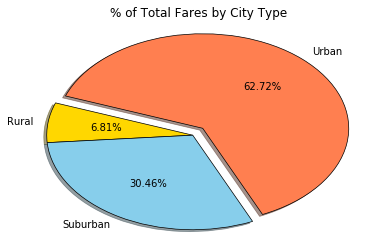

In [6]:
# Calculate Type Percents

typepercents = ridecitydf.groupby(['type']).sum()['fare'] / ridecitydf['fare'].sum() * 100
typepercents

# Build Pie Chart

plt.pie(typepercents, labels = ['Rural', 'Suburban', 'Urban'],
       colors=['gold', 'skyblue', 'coral'], explode=(0,0,.1), startangle=160, shadow=True,
       wedgeprops = {'linewidth':.7,'edgecolor': 'black'}, autopct ='%.2f%%')

plt.axis('tight')
plt.title ('% of Total Fares by City Type')
# Save Figure

plt.savefig('Pyber2')


In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

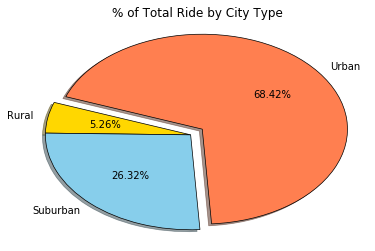

In [8]:
# Calculate Ride Percents
ridepercents = ridecitydf.groupby(['type']).count()['ride_id'] / ridecitydf['ride_id'].count() * 100
ridepercents

# Build Pie Chart

plt.pie(ridepercents, labels = ['Rural', 'Suburban', 'Urban'],
       colors=['gold', 'skyblue', 'coral'], explode=(0,0,.1), startangle=160, shadow=True,
       wedgeprops = {'linewidth':.7,'edgecolor': 'black'}, autopct ='%.2f%%')

plt.axis('tight')
plt.title ('% of Total Ride by City Type')


# Save Figure

plt.savefig('Pyber3')

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

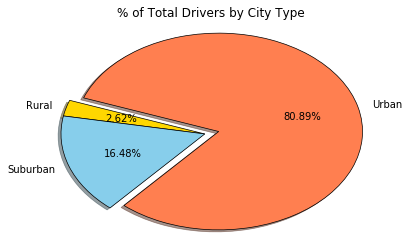

In [10]:
# Calculate Driver Percents
driverpercents = citydf.groupby(['type']).sum()['driver_count'] / citydf['driver_count'].sum() * 100


# Build Pie Chart

plt.pie(driverpercents, labels = ['Rural', 'Suburban', 'Urban'],
       colors=['gold', 'skyblue', 'coral'], explode=(0,0,.1), startangle=160, shadow=True,
       wedgeprops = {'linewidth':.7,'edgecolor': 'black'}, autopct ='%.2f%%')

plt.axis('tight')
plt.title ('% of Total Drivers by City Type')


# Save Figure

plt.savefig('Pyber4')

In [ ]:
# Show Figure
plt.show()

# Observations

1. Almost 90% of all Pyber drivers are located in Urban cities.
2. The cost of rides in rural area is significantly higher than urban rides.
3. Suburban rides make up roughly 26% off all Pyber rides.